# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#setup lists to hold response data
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []

url = "http://api.openweathermap.org/data/2.5/weather?"

# Get weather data
#loop to gather data
for city in cities:
    # Build query URL
    query_url = (f'{url}appid={api_key}&q={city}&units=imperial')

    #query and get response
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    #append query responses to lists
    #error handling for each individual append to ensure all lists have same counts
    try:
        print(f'Gathering data for {city}')
        clouds.append(weather_json['clouds']['all'])
    except KeyError:
        print(f'Error gathering {city}s values')
        clouds.append("0")
    try:
        country.append(weather_json['sys']['country'])
    except KeyError:
        country.append("na")
    try:
        date.append(weather_json['dt'])
    except KeyError:
        date.append("0")   
    try:
        humidity.append(weather_json['main']['humidity'])
    except KeyError:
        humidity.append("0")
    try:
        lat.append(weather_json['coord']['lat'])
    except KeyError:
        lat.append("0")
    try:
        lng.append(weather_json['coord']['lon'])
    except KeyError:
        lng.append("0")
        
    try:
        max_temp.append(weather_json['main']['temp_max'])
    except KeyError:
        max_temp.append("0")
        
    try:
        wind.append(weather_json['wind']['speed'])
    except KeyError:
        wind.append("0")
 
os.system('clear')
print("-------------------------------------------")
print("------Weather Data Retrieval Complete------")
print("-------------------------------------------")

Gathering data for bubaque
Gathering data for itarema
Gathering data for kropotkin
Gathering data for bluff
Gathering data for busselton
Gathering data for bam
Gathering data for luderitz
Gathering data for rikitea
Gathering data for diego de almagro
Gathering data for rafai
Gathering data for tabory
Gathering data for taolanaro
Error gathering taolanaros values
Gathering data for tsihombe
Error gathering tsihombes values
Gathering data for flinders
Gathering data for mikhaylovka
Gathering data for brigham city
Gathering data for bredasdorp
Gathering data for jurado
Error gathering jurados values
Gathering data for cape town
Gathering data for hilo
Gathering data for east london
Gathering data for samarai
Gathering data for tiznit
Gathering data for port-gentil
Gathering data for port alfred
Gathering data for faanui
Gathering data for lhuntshi
Error gathering lhuntshis values
Gathering data for yellowknife
Gathering data for souillac
Gathering data for port lincoln
Gathering data for 

Gathering data for portsmouth
Gathering data for nikolskoye
Gathering data for alofi
Gathering data for touros
Gathering data for hamilton
Gathering data for necochea
Gathering data for birao
Gathering data for shelburne
Gathering data for saldanha
Gathering data for lander
Gathering data for esperance
Gathering data for midyat
Gathering data for cubara
Gathering data for tuatapere
Gathering data for russell
Gathering data for grand gaube
Gathering data for aswan
Gathering data for dingle
Gathering data for lebu
Gathering data for buluang
Gathering data for port hardy
Gathering data for coahuayana
Gathering data for henties bay
Gathering data for kailua
Gathering data for platteville
Gathering data for chancay
Gathering data for ancud
Gathering data for lure
Gathering data for constantine
Gathering data for san patricio
Gathering data for miri
Gathering data for provideniya
Gathering data for bhainsdehi
Gathering data for saint-raymond
Gathering data for tadine
Gathering data for jalu


Gathering data for port shepstone
Gathering data for yushan
Gathering data for samusu
Error gathering samusus values
Gathering data for villa bruzual
Gathering data for kavaratti
Gathering data for tongren
Gathering data for trairi
Gathering data for chany
Gathering data for ocean city
Gathering data for itacoatiara
Gathering data for yendi
Gathering data for tabiauea
Error gathering tabiaueas values
Gathering data for wanning
Gathering data for patrocinio
Gathering data for inuvik
Gathering data for camacha
Gathering data for ambala
Gathering data for timon
Gathering data for sorvag
Error gathering sorvags values
Gathering data for elk city
Gathering data for longyan
Gathering data for gobindpur
Gathering data for mpika
Gathering data for vreed en hoop
Error gathering vreed en hoops values
Gathering data for liverpool
Gathering data for la palma
Gathering data for padang
Gathering data for mehran
Gathering data for coihaique
Gathering data for sembe
Error gathering sembes values
Gathe

In [23]:
#length to ensure I can combine to a new DF
print('cities')
print(len(cities))
print('Clouds')
print(len(clouds))
print('Country')
print(len(country))
print('Humidity')
print(len(humidity))
print('lat')
print(len(lat))
print('lng')
print(len(lng))
print('Max temp')
print(len(max_temp))
print('wind')
print(len(wind))
print('date')
print(len(date))

cities
597
Clouds
597
Country
597
Humidity
597
lat
597
lng
597
Max temp
597
wind
597
date
597


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#write lists into dataframes
df= pd.DataFrame({'City': cities, 'Cloudiness': clouds,'Country': country, 
                    'Date':date, 'Humidity': humidity, 'Lat':lat, 'Lng':lng,'Max Temp':max_temp, 'Wind Speed': wind})

df.head()

df.to_csv(path_or_buf='output_data/weatherPy.csv', header=True, index=False) 

In [25]:
#Check data types
df.dtypes



City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [26]:
#change to numeric

df['Cloudiness'] = pd.to_numeric(df['Cloudiness'])
df['Date'] = pd.to_numeric(df['Date'])
df['Humidity'] = pd.to_numeric(df['Humidity'])
df['Lat'] = pd.to_numeric(df['Lat'])
df['Lng'] = pd.to_numeric(df['Lng'])
df['Max Temp'] = pd.to_numeric(df['Max Temp'])
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'])

df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

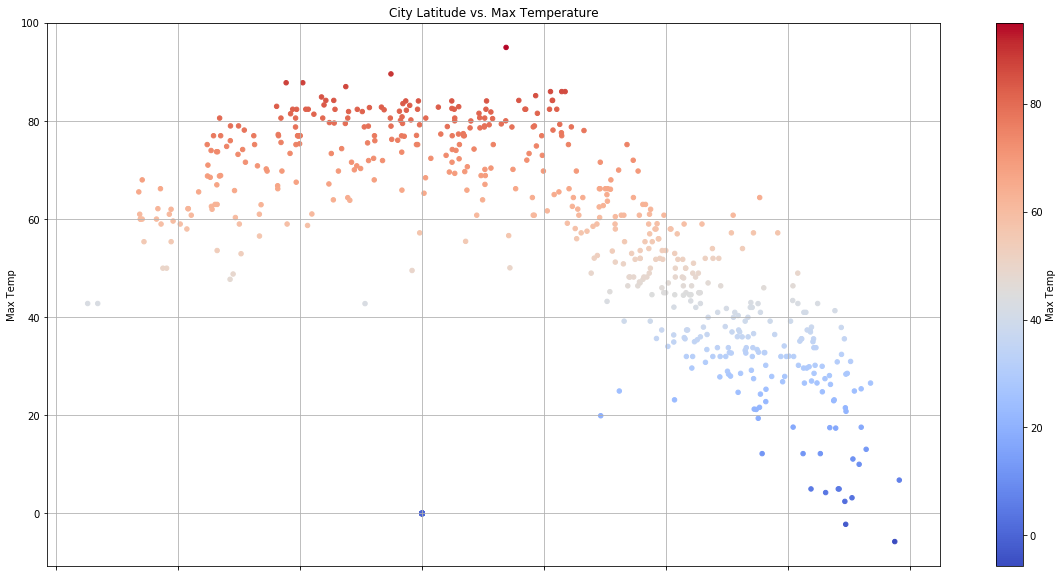

In [33]:
#plotting results

df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(20,10),
              title="City Latitude vs. Max Temperature", c='Max Temp', colormap='coolwarm')

plt.savefig('output_data/lat_vs_temp.png')

#### Latitude vs. Humidity Plot

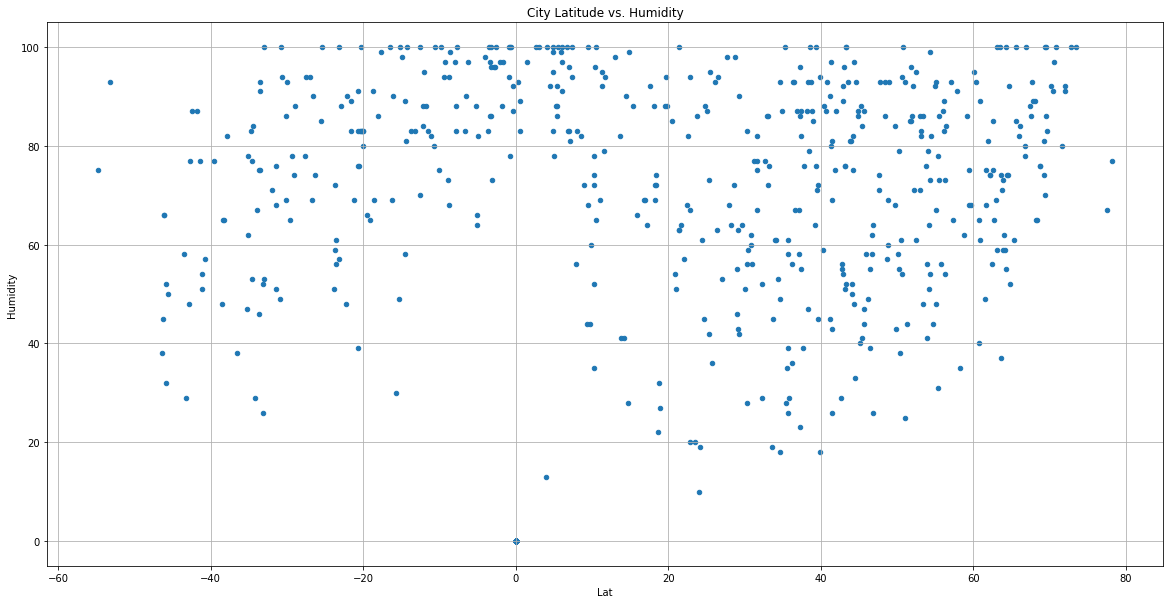

In [28]:
df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(20,10),
              title="City Latitude vs. Humidity")
plt.savefig('output_data/lat_vs_humid.png')

#### Latitude vs. Cloudiness Plot

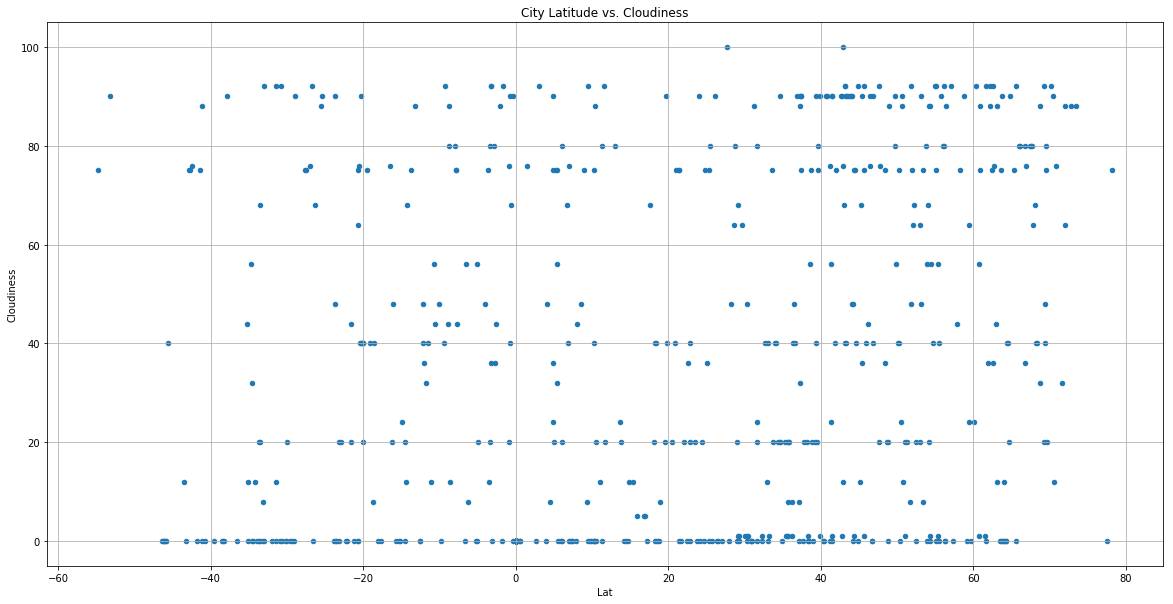

In [29]:
df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(20,10),
              title="City Latitude vs. Cloudiness")
plt.savefig('output_data/lat_vs_cloud.png')

#### Latitude vs. Wind Speed Plot

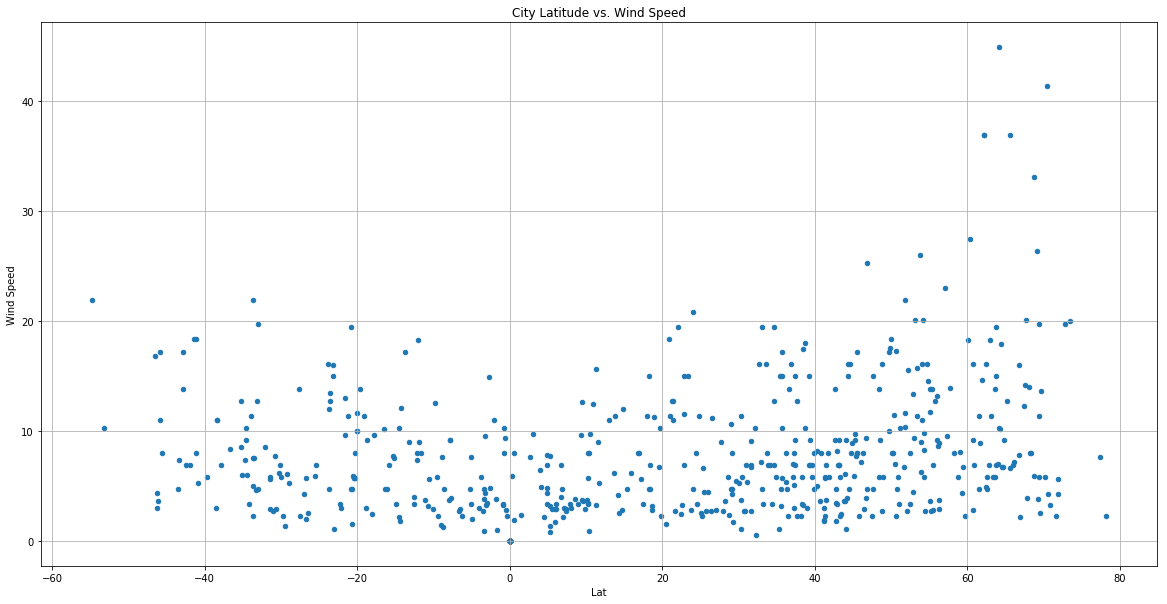

In [30]:
df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(20,10),
              title="City Latitude vs. Wind Speed")

plt.savefig('output_data/lat_vs_wind.png')